# Prediction of Total Meal Reimbursements for School Nutrition Programs in Texas

This project will explore meal reimbursement data institutions in Texas receive from the Texas Department of Agriculture elegible for school nutrition programs for the 2018-2019 school year. The aim is to predict the total federal meal reimbursement amount an institution receives given its features.
<br><br>
__Hypothesis:__ <br>
Quantity of free eligiblity students (students that receive free meals) has the strongest correlation to the total reimbursement an institution receives.
<br><br>
Schools who receive less than the average amount for total reimbursement will also be explored in greater depth.

# Data Wrangling

Data and information retrieved from the Texas government data portal. <br>
https://data.texas.gov/Agriculture/School-Nutrition-Programs-Meal-Reimbursement-Infor/uuki-47ik

### Data Collection / Data Organization

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

In [2]:
print(os.getcwd())
print(os.listdir())

C:\Users\filia\Springboard DS\Capstone 2
['.ipynb_checkpoints', 'mbti_1.csv', 'Prediction of Total Reimbursements for Lunch Programs in Texas.ipynb', 'SNL Reimbursement 2018-2019.csv', 'US Births 2018']


In [3]:
df = pd.read_csv('SNL Reimbursement 2018-2019.csv')

## Data Definition

- Columns:
    - __Program Year:__ All values are 2018-2019 <br>
    - __Report Type:__ Type of information in dataset (school nutrition program claims) <br>
    - __CEID:__ Unique number assigned to Contracting Entity (CE) to identify organization as a school nutrition program sponsor <br>
    - __CEName:__ Contracting entity name <br>
    - __TypeOfAgency:__ Type of agency the Contracting Entity (CE) operates as: Educational Institution, Private Non Profit  Organization, Government Agency, Other <br>
    - __TypeOfOrg:__ Type of organization the sponsored site operates as: Charter, Private, Public, RCCI (Residential Child Care Institution) <br>
    - __ESC:__ Educational service region (1-20) https://tea.texas.gov/about-tea/other-services/education-service-centers <br>
    - __TDARegion:__ Texas Department of Agriculture (TDA) service region (1-5) <br>
    - __SiteID:__ Number assigned to identify site within CE <br>
    - __SiteName:__ Site name <br>
    - __CountryDistrictCode:__ County District Code for county in which Contracting Entity (CE) in located <br>
    - __CECounty:__ County in which the Contracting Entity (CE) is located <br>
    - __SiteCounty:__ County in which the site is located <br>
    - __ClaimDate:__ Month and year being reported for reimbursement of meals served, the school nutrition program year begins July 1 and ends June 30 <br>
    - __EnrollmentQty:__ Number of children enrolled at site for claim month<br>
    - __FreeEligQty:__ Number of children enrolled at site approved for free meals for claim month <br>
    - __RedcEligQty:__ Number of children enrolled at site approved for reduced price meals for claim month <br>
    - __PaidEligQty:__ Number of children enrolled at site not approved for free or reduced price meals for claim month <br>
    - __TotalReimbursement:__ Total federal meal reimbursement for claim month <br><br>
- These following columns all apply to breakfast, lunch, snacks and milk each institution received: <br>
    - __Days:__ Number of days [feature] was served at site for claim month <br>
    - __Total:__ Total number of [feature] served at site for claim month <br>
    - __ADP:__ Average Daily Participation (ADP) for [feature]. Calculated as the number of [feature] served at site in claim month divided by the number of [feature] service days at site in claim month. <br>
    - __ServedFree:__ Total number of free [feature] served at site for claim month <br>
    - __ServedRedc:__ Total number of reduced price [feature] served at site for claim month <br>
    - __ServedPaid:__ Total number of paid [feature] served at site for claim month <br>
    - __Reimbursement:__ Total [feature] reimbursement for claim month
<br>

### Dataset Exploration

In [4]:
df.columns

Index(['ProgramYear', 'ReportType', 'CEID', 'CEName', 'TypeOfAgency',
       'TypeOfOrg', 'ESC', 'TDARegion', 'SiteID', 'SiteName',
       'CountyDistrictCode', 'CECounty', 'SiteCounty', 'ClaimDate',
       'EnrollmentQty', 'FreeEligQty', 'RedcEligQty', 'PaidEligQty',
       'BreakfastDays', 'BreakfastTotal', 'BreakfastADP',
       'BreakfastServedFree', 'BreakfastServedRedc', 'BreakfastServedPaid',
       'LunchDays', 'LunchTotal', 'LunchADP', 'LunchServedFree',
       'LunchServedRedc', 'LunchServedPaid', 'SnackDays', 'SnackTotal',
       'SnackADP', 'SnacksServedFree', 'SnacksServedRedc', 'SnacksServedPaid',
       'MilkDays', 'Milktotal', 'MilkADP', 'MilkServedFree',
       'MilkServedReduced', 'MilkServedPaid', 'BreakfastReimbursement',
       'LunchReimbursement', 'SnackReimbursement', 'MilkReimbursement',
       'TotalReimbursement'],
      dtype='object')

In [5]:
#school year is defined from july 2018 to june 2019
df.ClaimDate.unique()

array(['08/01/2018 12:00:00 AM', '09/01/2018 12:00:00 AM',
       '10/01/2018 12:00:00 AM', '11/01/2018 12:00:00 AM',
       '12/01/2018 12:00:00 AM', '01/01/2019 12:00:00 AM',
       '02/01/2019 12:00:00 AM', '03/01/2019 12:00:00 AM',
       '04/01/2019 12:00:00 AM', '05/01/2019 12:00:00 AM',
       '06/01/2019 12:00:00 AM', '07/01/2018 12:00:00 AM'], dtype=object)

In [6]:
df.shape

(86358, 47)

In [7]:
sample = df.sample(10)
sample.head()

,ProgramYear,ReportType,CEID,CEName,TypeOfAgency,TypeOfOrg,ESC,TDARegion,SiteID,SiteName,...,Milktotal,MilkADP,MilkServedFree,MilkServedReduced,MilkServedPaid,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,MilkReimbursement,TotalReimbursement
21747,2018-2019,SCHOOLNUTRITIONPROGRAMCLAIMS,281,IRVING ISD,Educational Institution,Public,10,2,46,HOUSTON MIDDLE,...,0,0.0,0,0,0,6764.57,21241.49,0.0,0.0,28006.06
26347,2018-2019,SCHOOLNUTRITIONPROGRAMCLAIMS,335,MIDLOTHIAN ISD,Educational Institution,Public,10,2,42,FRANK SEALE MIDDLE SCHOOL,...,0,0.0,0,0,0,874.67,6755.88,0.0,0.0,7630.55
74342,2018-2019,SCHOOLNUTRITIONPROGRAMCLAIMS,1053,WALL ISD,Educational Institution,Public,15,4,41,WALL MIDDLE,...,0,0.0,0,0,0,633.84,2769.83,0.0,0.0,3403.67
43031,2018-2019,SCHOOLNUTRITIONPROGRAMCLAIMS,524,KATY ISD,Educational Institution,Public,4,3,128,URSULA STEPHENS ELEMENTARY,...,0,0.0,0,0,0,9223.27,31100.82,0.0,0.0,40324.09
85808,2018-2019,SCHOOLNUTRITIONPROGRAMCLAIMS,4581,INTERNATIONAL LEADERSHIP OF TEXAS,Educational Institution,Charter,10,2,32,LANCASTER H S,...,0,0.0,0,0,0,370.05,1559.86,0.0,0.0,1929.91


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86358 entries, 0 to 86357
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProgramYear             86358 non-null  object 
 1   ReportType              86358 non-null  object 
 2   CEID                    86358 non-null  int64  
 3   CEName                  86358 non-null  object 
 4   TypeOfAgency            86358 non-null  object 
 5   TypeOfOrg               86358 non-null  object 
 6   ESC                     86358 non-null  int64  
 7   TDARegion               86358 non-null  int64  
 8   SiteID                  86358 non-null  int64  
 9   SiteName                86358 non-null  object 
 10  CountyDistrictCode      86358 non-null  int64  
 11  CECounty                86358 non-null  object 
 12  SiteCounty              86358 non-null  object 
 13  ClaimDate               86358 non-null  object 
 14  EnrollmentQty           86358 non-null

In [9]:
df.describe()

,CEID,ESC,TDARegion,SiteID,CountyDistrictCode,EnrollmentQty,FreeEligQty,RedcEligQty,PaidEligQty,BreakfastDays,...,Milktotal,MilkADP,MilkServedFree,MilkServedReduced,MilkServedPaid,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,MilkReimbursement,TotalReimbursement
count,86358.000000,86358.000000,86358.000000,86358.000000,86358.000000,86358.000000,86358.000000,86358.000000,86358.000000,86358.000000,...,86358.000000,86358.000000,86358.0,86358.0,86358.000000,86358.000000,86358.000000,86358.000000,86358.000000,86358.000000
mean,632.918421,9.808356,2.777843,88.758841,112647.892749,628.683446,391.409945,27.593680,209.638296,17.155874,...,0.415862,0.022574,0.0,0.0,0.415862,7083.199985,17774.520005,159.980285,0.085253,25017.785527
std,593.102231,5.695671,1.171567,190.509003,73807.025708,514.843876,349.080457,39.240117,333.179635,4.621715,...,25.935774,1.380167,0.0,0.0,25.935774,7157.682157,15189.520546,716.330037,5.316873,21588.896915
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,4.000000,2.000000,38.000000,57905.000000,334.000000,151.000000,0.000000,8.000000,16.000000,...,0.000000,0.000000,0.0,0.0,0.000000,1876.620000,6385.625000,0.000000,0.000000,8604.230000
50%,525.000000,10.000000,3.000000,101.000000,101912.000000,539.000000,320.500000,16.000000,92.000000,18.000000,...,0.000000,0.000000,0.0,0.0,0.000000,4793.210000,14326.285000,0.000000,0.000000,19706.780000
75%,918.000000,13.000000,4.000000,113.000000,174909.000000,757.000000,525.000000,40.000000,273.000000,20.000000,...,0.000000,0.000000,0.0,0.0,0.000000,10209.920000,25279.087500,0.000000,0.000000,36146.940000
max,6378.000000,20.000000,5.000000,9005.000000,254902.000000,15328.000000,5030.000000,675.000000,14544.000000,31.000000,...,2473.000000,125.050000,0.0,0.0,2473.000000,113584.770000,255064.050000,38685.010000,506.970000,368648.820000


In [10]:
#print(df.isnull().sum())

In [11]:
#Function that calculates percentage of missing data per column
def missingData(dataframe):
    missing = False
    for item in (dataframe.isnull().sum()).iteritems():
        if item[1] > 0:
            print('Missing Data percentage for '+item[0]+' is {:2.2%}'.format((item[1]/dataframe.shape[0])) )
            missing = True
    if not missing:
        print('Found no missing values.')

In [12]:
missingData(df)

Found no missing values.


### Check for duplicates

In [13]:
num_dups = len(df) - len(df.drop_duplicates())
print(num_dups)
df = df.drop_duplicates()

0


### Explore the distributions of total reimbursements and type of agencies for school lunch programs

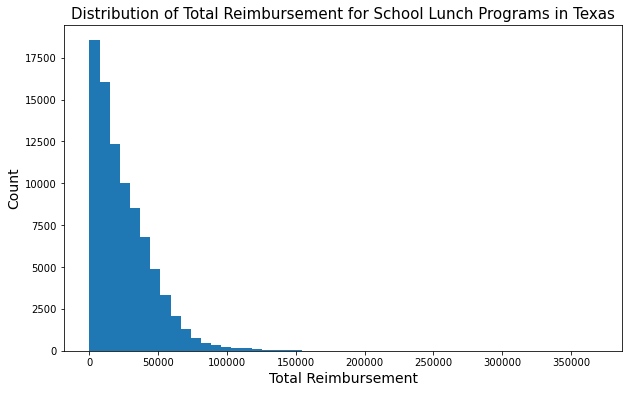

In [14]:
plt.figure(figsize=(10,6))
plt.hist(df['TotalReimbursement'], bins=50)
plt.title('Distribution of Total Reimbursement for School Lunch Programs in Texas', fontsize=15)
plt.xlabel('Total Reimbursement', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

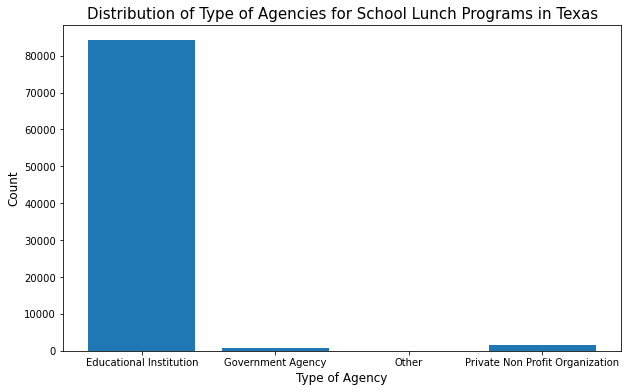

In [15]:
plt.figure(figsize=(10,6))
labels, counts = np.unique(df['TypeOfAgency'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Distribution of Type of Agencies for School Lunch Programs in Texas', fontsize=15)
plt.xlabel('Type of Agency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

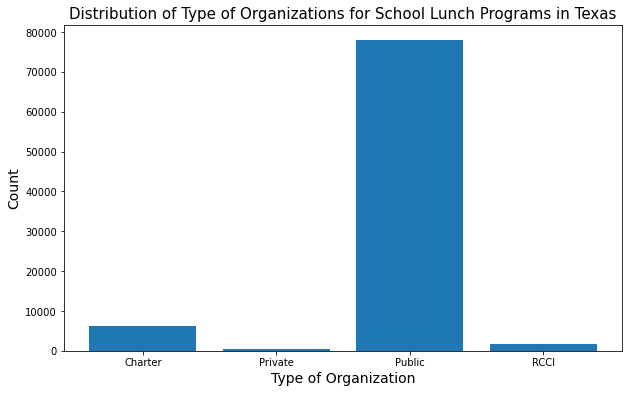

In [16]:
plt.figure(figsize=(10,6))
labels, counts = np.unique(df['TypeOfOrg'], return_counts=True)
'''orgs = dict(zip(labels, counts))
print(orgs)
sorted_orgs = sorted(orgs.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_orgs)'''

plt.bar(labels, counts, align='center')
plt.title('Distribution of Type of Organizations for School Lunch Programs in Texas', fontsize=15)
plt.xlabel('Type of Organization', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

### Spread of average daily participation of features

In [49]:
adp = df.loc[:,['BreakfastADP','LunchADP']]
#adp.head()

,BreakfastADP,LunchADP
0,40.30,94.10
1,43.00,90.95
2,45.50,83.55
3,45.65,86.47
4,42.33,80.13


In [50]:
adp_melted = pd.melt(adp, var_name='Good Provided', value_name='Average Daily Participation')
type_adp = adp_melted['Good Provided'].unique()
good = ['Breakfast','Lunch']

adp_melted['Good Provided'] = adp_melted['Good Provided'].replace(type_adp,good)
adp_melted.head()

,Good Provided,Average Daily Participation
0,Breakfast,40.30
1,Breakfast,43.00
2,Breakfast,45.50
3,Breakfast,45.65
4,Breakfast,42.33


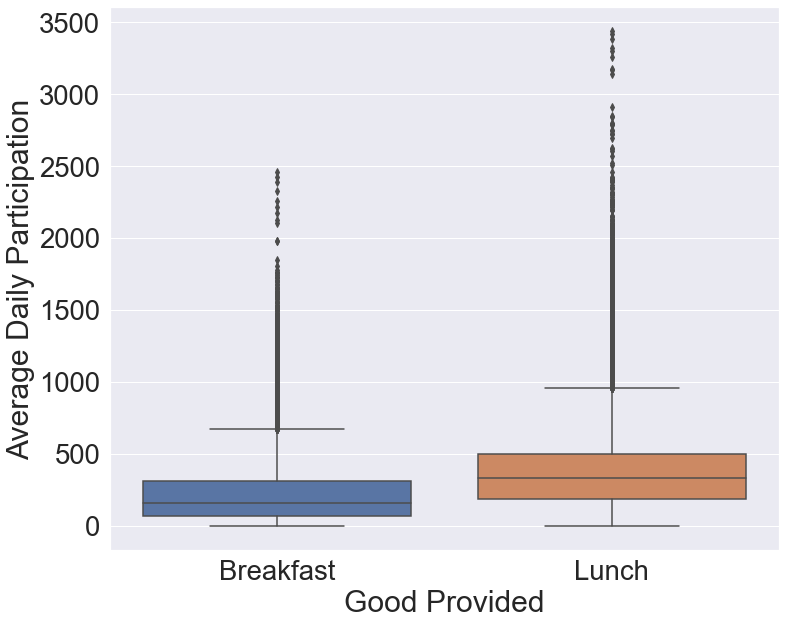

In [52]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Good Provided", y="Average Daily Participation", data=adp_melted)

In [53]:
milk_snack = df.loc[:,['MilkADP','SnackADP']]

In [56]:
milk_snack_melted = pd.melt(milk_snack, var_name='Good Provided', value_name='Average Daily Participation')
type_adp = milk_snack_melted['Good Provided'].unique()
good = ['Milk','Snack']

milk_snack_melted['Good Provided'] = milk_snack_melted['Good Provided'].replace(type_adp,good)

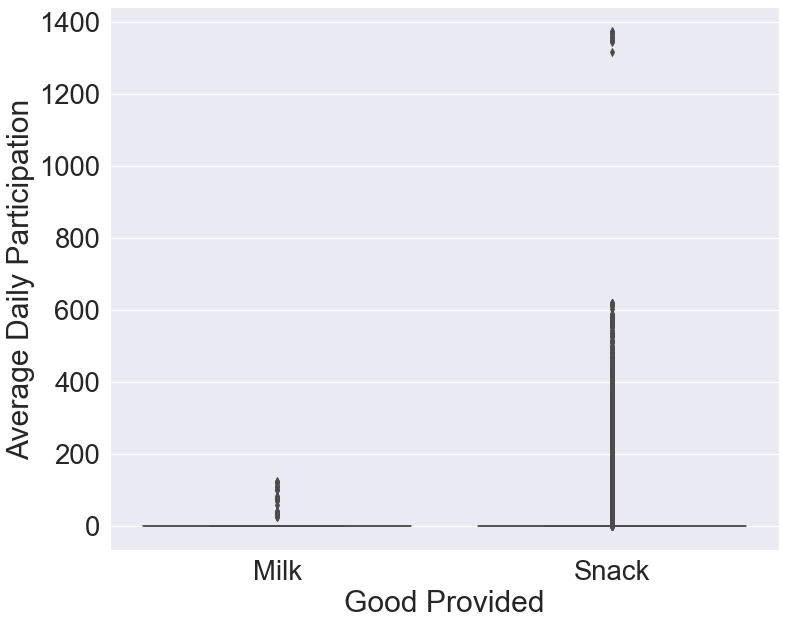

In [57]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Good Provided", y="Average Daily Participation", data=milk_snack_melted)

### Average total reimbursement based on educational service region

In [17]:
row = [x for x in range(1,21)]
region = ['Edinburg','Corpus Christi','Victoria','Houston','Beaumont','Huntsville','Kilgore','Mount Pleasant','Wichita Falls','Richardson','Fort Worth','Waco','Austin','Abilene','San Angelo','Amarillo','Lubbock','Midland','El Paso', 'San Antonio']
df['ESC'] = df['ESC'].replace(row, region)

In [18]:
esc_total = df.groupby('ESC')[['TotalReimbursement']].mean().sort_values(by='TotalReimbursement',ascending=False)
print(esc_total.head())

                TotalReimbursement
ESC                               
Edinburg              45765.806681
El Paso               34589.845926
Houston               31849.962420
San Antonio           26098.511877
Corpus Christi        25534.867987


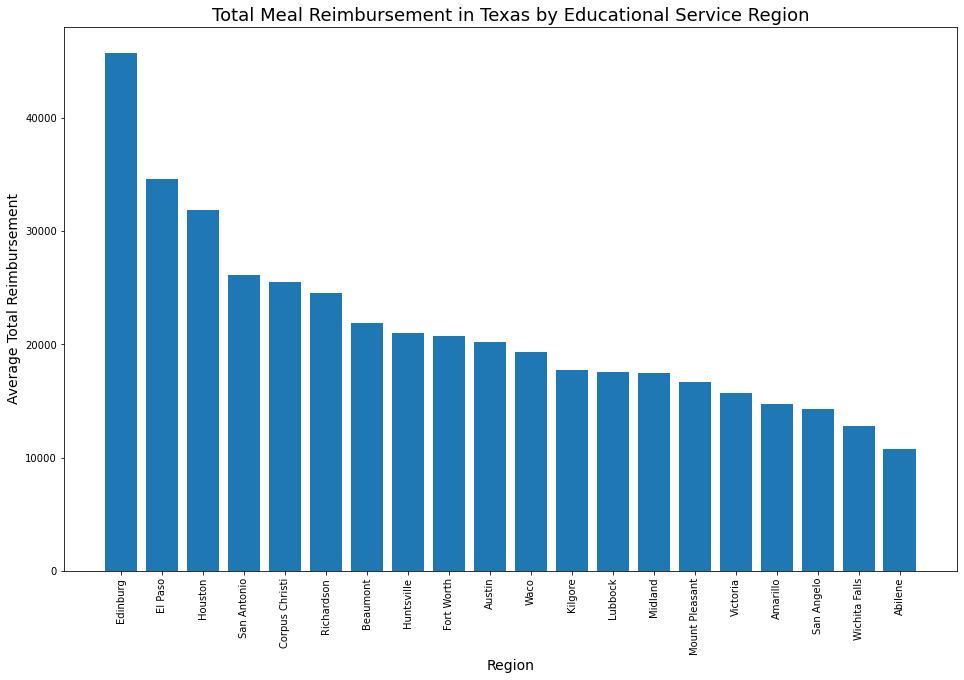

In [19]:
#describe how money is reimbursed by the 20 educational service regions in Texas
plt.figure(figsize=(16,10))
plt.bar(esc_total.index, esc_total.TotalReimbursement, align='center')
plt.title('Total Meal Reimbursement in Texas by Educational Service Region', fontsize=18)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Total Reimbursement', fontsize=14)
plt.xticks(rotation=90)
plt.show()

### Scatter plot view of type of student eligibility for program and total reimbursement

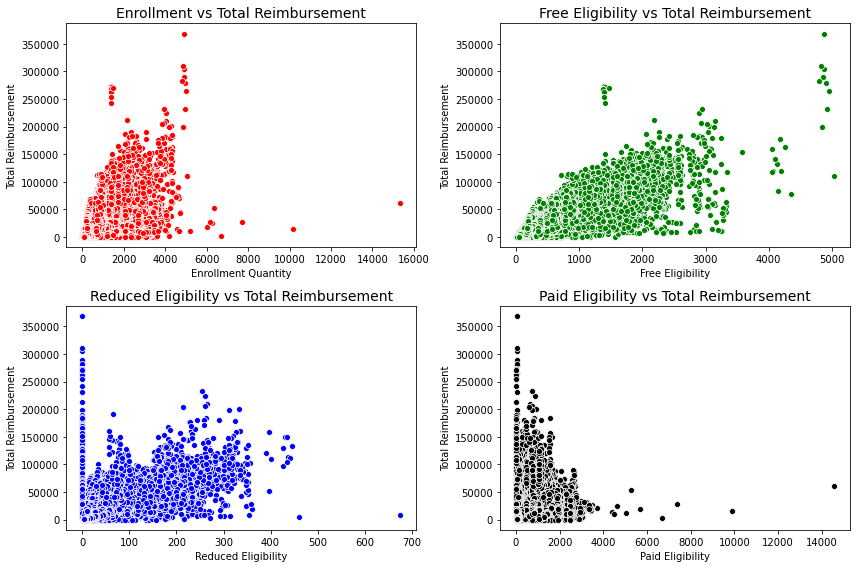

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.scatterplot(df['EnrollmentQty'], df['TotalReimbursement'], color='red')
plt.xlabel('Enrollment Quantity')
plt.ylabel('Total Reimbursement')
plt.title('Enrollment vs Total Reimbursement', fontsize=14)

plt.subplot(2,2,2)
sns.scatterplot(df['FreeEligQty'], df['TotalReimbursement'], color='green')
plt.xlabel('Free Eligibility')
plt.ylabel('Total Reimbursement')
plt.title('Free Eligibility vs Total Reimbursement', fontsize=14)

plt.subplot(2,2,3)
sns.scatterplot(df['RedcEligQty'], df['TotalReimbursement'], color='blue')
plt.xlabel('Reduced Eligibility')
plt.ylabel('Total Reimbursement')
plt.title('Reduced Eligibility vs Total Reimbursement', fontsize=14)

plt.subplot(2,2,4)
sns.scatterplot(df['PaidEligQty'], df['TotalReimbursement'], color='black')
plt.xlabel('Paid Eligibility')
plt.ylabel('Total Reimbursement')
plt.title('Paid Eligibility vs Total Reimbursement', fontsize=14)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Free Eligibility vs Total Reimbursement by Organization')

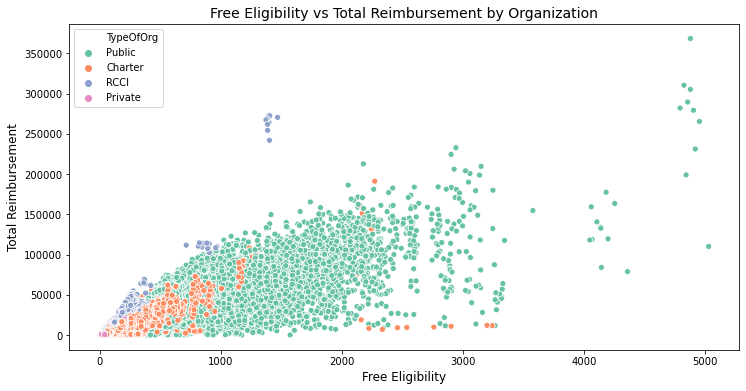

In [21]:
#further exploring free eligibility by type of organization
plt.figure(figsize=(12,6))
sns.scatterplot(x='FreeEligQty', y='TotalReimbursement', hue='TypeOfOrg',  palette="Set2", data=df)
plt.xlabel('Free Eligibility', fontsize=12)
plt.ylabel('Total Reimbursement', fontsize=12)
plt.title('Free Eligibility vs Total Reimbursement by Organization', fontsize=14)

### Scatter plot view of type of reimbursements and total reimbursement

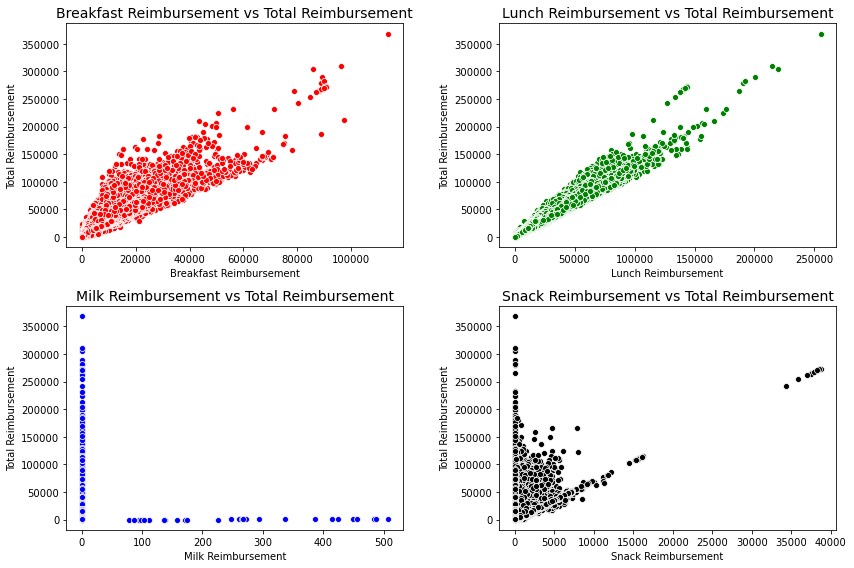

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.scatterplot(df['BreakfastReimbursement'], df['TotalReimbursement'], color='red')
plt.xlabel('Breakfast Reimbursement')
plt.ylabel('Total Reimbursement')
plt.title('Breakfast Reimbursement vs Total Reimbursement', fontsize=14)

plt.subplot(2,2,2)
sns.scatterplot(df['LunchReimbursement'], df['TotalReimbursement'], color='green')
plt.xlabel('Lunch Reimbursement')
plt.ylabel('Total Reimbursement')
plt.title('Lunch Reimbursement vs Total Reimbursement', fontsize=14)

plt.subplot(2,2,3)
sns.scatterplot(df['MilkReimbursement'],df['TotalReimbursement'], color='blue')
plt.xlabel('Milk Reimbursement')
plt.ylabel('Total Reimbursement')
plt.title('Milk Reimbursement vs Total Reimbursement', fontsize=14)

plt.subplot(2,2,4)
sns.scatterplot(df['SnackReimbursement'], df['TotalReimbursement'], color='black')
plt.xlabel('Snack Reimbursement')
plt.ylabel('Total Reimbursement')
plt.title('Snack Reimbursement vs Total Reimbursement', fontsize=14)

plt.tight_layout()
plt.show()

### Strongest correlation to total reimbursement

In [23]:
#id columns and columns with constant values
not_include = ['ProgramYear','ReportType','CEID','SiteID','MilkServedFree','MilkServedReduced']
data = df.drop(columns=not_include)
print(len(data.columns))

41


In [24]:
#selecting categorical columns (all are non-binomial)
df_cat = data.select_dtypes(include = 'object').copy()
categorical = [col for col in df_cat.columns]
print(categorical)
print(len(categorical))

['CEName', 'TypeOfAgency', 'TypeOfOrg', 'ESC', 'SiteName', 'CECounty', 'SiteCounty', 'ClaimDate']
8


In [25]:
#selecting numerical columns
numerical = [col for col in data.columns if col not in categorical]
print(numerical)
print(len(numerical))

['TDARegion', 'CountyDistrictCode', 'EnrollmentQty', 'FreeEligQty', 'RedcEligQty', 'PaidEligQty', 'BreakfastDays', 'BreakfastTotal', 'BreakfastADP', 'BreakfastServedFree', 'BreakfastServedRedc', 'BreakfastServedPaid', 'LunchDays', 'LunchTotal', 'LunchADP', 'LunchServedFree', 'LunchServedRedc', 'LunchServedPaid', 'SnackDays', 'SnackTotal', 'SnackADP', 'SnacksServedFree', 'SnacksServedRedc', 'SnacksServedPaid', 'MilkDays', 'Milktotal', 'MilkADP', 'MilkServedPaid', 'BreakfastReimbursement', 'LunchReimbursement', 'SnackReimbursement', 'MilkReimbursement', 'TotalReimbursement']
33


In [26]:
#seperating actual categorical values from the numerical ones
actual_cat = ['ESC', 'TDARegion', 'CountyDistrictCode']

numerical = [col for col in numerical if col not in actual_cat]
print(numerical)
print(len(numerical))

['EnrollmentQty', 'FreeEligQty', 'RedcEligQty', 'PaidEligQty', 'BreakfastDays', 'BreakfastTotal', 'BreakfastADP', 'BreakfastServedFree', 'BreakfastServedRedc', 'BreakfastServedPaid', 'LunchDays', 'LunchTotal', 'LunchADP', 'LunchServedFree', 'LunchServedRedc', 'LunchServedPaid', 'SnackDays', 'SnackTotal', 'SnackADP', 'SnacksServedFree', 'SnacksServedRedc', 'SnacksServedPaid', 'MilkDays', 'Milktotal', 'MilkADP', 'MilkServedPaid', 'BreakfastReimbursement', 'LunchReimbursement', 'SnackReimbursement', 'MilkReimbursement', 'TotalReimbursement']
31


In [27]:
categorical.extend(actual_cat)
print(categorical)
print(len(categorical))

['CEName', 'TypeOfAgency', 'TypeOfOrg', 'ESC', 'SiteName', 'CECounty', 'SiteCounty', 'ClaimDate', 'ESC', 'TDARegion', 'CountyDistrictCode']
11


In [28]:
#this function is used to get correlation between categorical features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [29]:
#this function is used for correlation between multi-level categorical features (non-binomial) and numerical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [30]:
columns = data.columns
corr = pd.DataFrame(index=columns, columns=columns)

for i in range(0, len(columns)):
    for j in range(i, len(columns)):
        
            if i == j:
                corr_factor = 1.0
            
            elif (columns[i] in categorical) and ((columns[j] in categorical)):
                corr_factor =  cramers_v(data[columns[j]], data[columns[i]])
            
            elif (columns[i] in numerical) and (columns[j] in numerical):
                corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])
                if pvalue > 0.05:
                    corr_factor = np.nan
            
            elif (columns[i] in numerical) and ((columns[j] in categorical)):
                corr_factor =  correlation_ratio(data[columns[j]], data[columns[i]])
                
            elif (columns[i] in categorical) and ((columns[j] in numerical)):
                corr_factor =  correlation_ratio(data[columns[i]], data[columns[j]])
            
            #else:
                #if categorical variable is binomial use points biserial
                #corr_factor, pvalue = ss.pointbiserialr(data[columns[j]], data[columns[i]])
                
                #if pvalue > 0.05:
                    #corr_factor = np.nan
                
            corr.loc[columns[j],columns[i]] = corr_factor
    
#corr.fillna(value=np.nan,inplace=True)
#plt.figure(figsize=(20,10))
#sns.set(font_scale=1.8) 
#sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 16})
#plt.show()

In [31]:
corr.loc[['TotalReimbursement'],:].tail().T

,TotalReimbursement
CEName,0.636389
TypeOfAgency,0.105583
TypeOfOrg,0.128085
ESC,0.376298
TDARegion,0.273684
SiteName,0.905861
CountyDistrictCode,0.633506
CECounty,0.473946
SiteCounty,0.466755
ClaimDate,0.264707


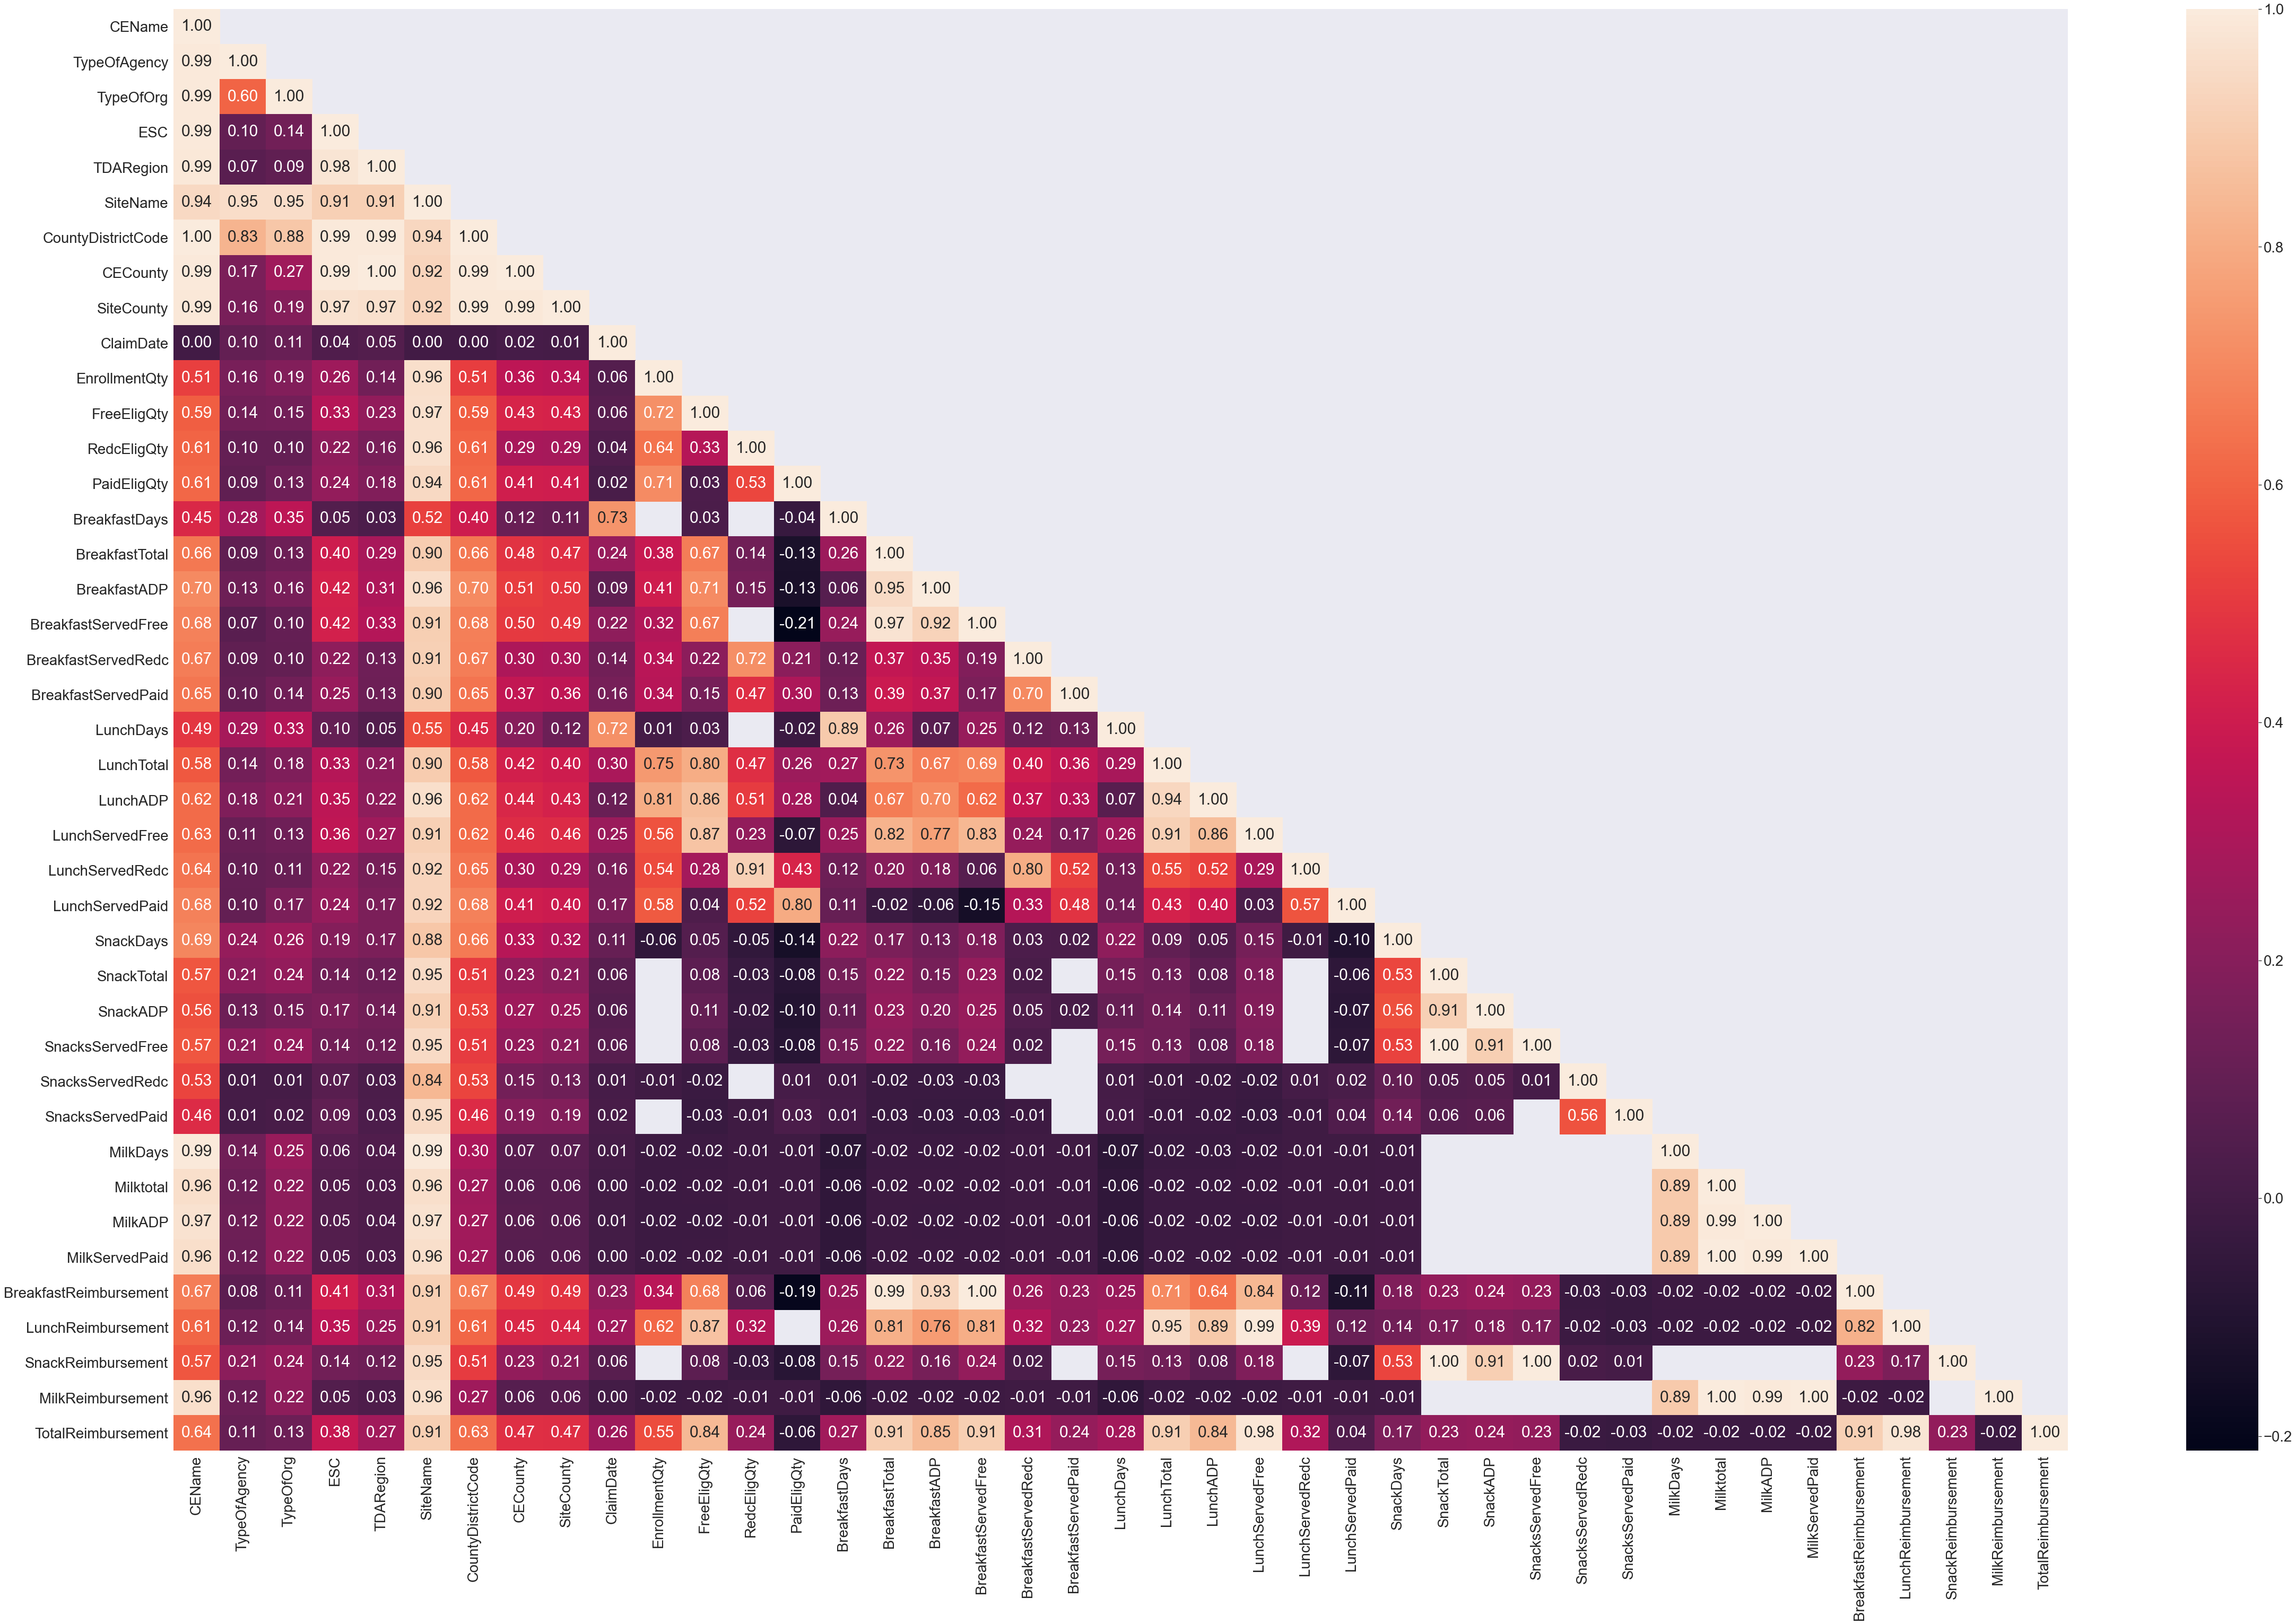

In [32]:
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(80,50))
sns.set(font_scale=2.5) 
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 30})
plt.show()